In [1]:
from train import *
import pandas as pd
import numpy as np
from vectorrvnn.utils import *
from collections import defaultdict
import pickle
import os
import os.path as osp

def loadModelFromExptName (checkpoints_dir, name) : 
    """ Load the model at the end of training """
    with open(osp.join(checkpoints_dir, name, 'opts.pkl'), 'rb') as fp : 
        opts = pickle.load(fp) 
    ckptpath = osp.join(checkpoints_dir, name, 'training_end.pth')
    opts['modelcls'] = NN_CLASSES[opts['modelcls']]
    Option = namedtuple('Option', [k for k in opts]) 
    opts = Option(*[v for _, v in opts.items()])
    ModelCls = opts.modelcls
    model = ModelCls(opts).float()
    state_dict = torch.load(ckptpath, map_location=opts.device)
    model.load_state_dict(state_dict['model'])
    model.to(opts.device)
    model.eval()
    print(model)
    return model, opts

model, opts = loadModelFromExptName('../results', 'fourier_run')
# model2, opts = loadModelFromExptName('../results', 'allrun1')
# model3, opts = loadModelFromExptName('../results', 'run1')

FourierColorBBoxTransformer(
  (embed): Linear(in_features=32, out_features=128, bias=True)
  (net): Transformer(
    (layers): ModuleList(
      (0): EncoderLayer(
        (self_attn): MultiHeadedAttention(
          (linears): ModuleList(
            (0): Linear(in_features=128, out_features=128, bias=True)
            (1): Linear(in_features=128, out_features=128, bias=True)
            (2): Linear(in_features=128, out_features=128, bias=True)
            (3): Linear(in_features=128, out_features=128, bias=True)
          )
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (feed_forward): PositionwiseFeedForward(
          (w_1): Linear(in_features=128, out_features=512, bias=True)
          (w_2): Linear(in_features=512, out_features=128, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (sublayer): ModuleList(
          (0): SublayerConnection(
            (norm): LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
    

In [2]:
publicDomain = '../data/PublicDomainVectors'
svgFiles = [f for f in allfiles(publicDomain) if f.endswith('svg')][:500]
publicdata  = [SVGData(_) for _ in svgFiles]
# Filter out graphics with too many paths. 
publicdata = [_ for _ in publicdata if _.nPaths < opts.max_len]

/home/labuser/.local/lib/python3.6/site-packages/svgpathtools-1.4.1-py3.6.egg/svgpathtools/path.py:3260: UserWarning:

Replacing degenerate (zero radius) Arc with a Line: Arc(start=(662.94+341.62j), radius=(0.62897+0j), rotation=0.0, large_arc=1.0, sweep=1.0, end=(661.6800000000001+341.62j)) --> Line(start=(662.94+341.62j), end=(661.6800000000001+341.62j))

/home/labuser/.local/lib/python3.6/site-packages/svgpathtools-1.4.1-py3.6.egg/svgpathtools/path.py:3260: UserWarning:

Replacing degenerate (zero radius) Arc with a Line: Arc(start=(661.6800000000001+341.62j), radius=(0.62897+0j), rotation=0.0, large_arc=1.0, sweep=1.0, end=(662.94+341.62j)) --> Line(start=(661.6800000000001+341.62j), end=(662.94+341.62j))



My Annotations


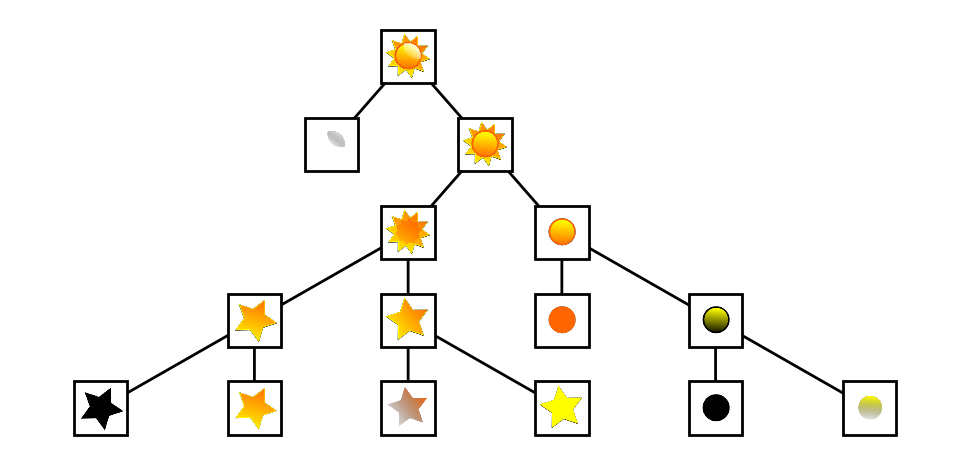

In [7]:
i = 8
print('My Annotations')
treeImageFromGraph(model.greedyTree(publicdata[i]))
plt.show()
# treeImageFromGraph(model1.containmentGuidedTree(publicdata[i]))
# plt.show()
# print('All Emoji Annotations') 
# treeImageFromGraph(model2.greedyTree(publicdata[i]))
# plt.show()
# treeImageFromGraph(model2.containmentGuidedTree(publicdata[i]))
# plt.show()
# print('Other Dataset') 
# treeImageFromGraph(model3.greedyTree(publicdata[i]))
# plt.show()
# treeImageFromGraph(model3.containmentGuidedTree(publicdata[i]))
# plt.show()
# treeImageFromGraph(autogroup(publicdata[i]))